In [153]:
import pandas as pd
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 



In [154]:
# génération d'un dataset

genes =['gene'+ str(i) for i in range(1,101)]

wt= ['wt'+ str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [155]:
# création d'un dataframe

df= pd.DataFrame(columns=wt+ko, index=genes)

for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

display(df.head())
print(df.shape)



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,377,323,358,385,390,856,836,883,862,829
gene2,388,332,365,359,360,939,940,930,1002,951
gene3,891,881,901,907,847,327,342,360,337,342
gene4,300,319,313,313,267,636,632,598,675,614
gene5,930,955,890,906,860,363,375,373,355,359


(100, 10)


In [156]:
#avant d'utiliser le PCA nous allons 'scale' les données:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_col = df.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.T)



pca=PCA()
pca_data = pca.fit_transform(scaled_data)




In [157]:
# Déterminons le % de la varaince globale calculé pour chaque PC

pc_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(pc_var)+1)]

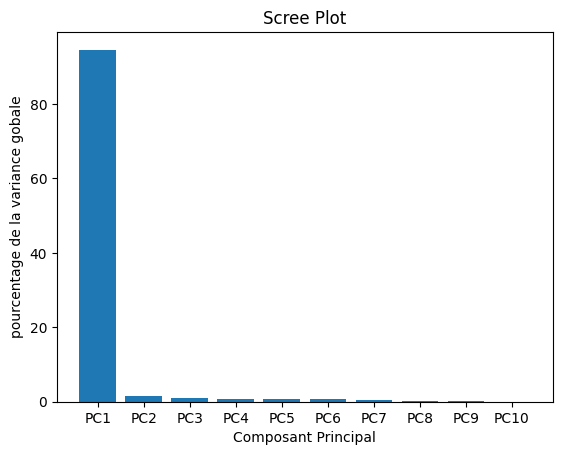

In [158]:
# Construction du Scree plot

plt.bar(x=labels,height=pc_var)
plt.ylabel('pourcentage de la variance gobale')
plt.xlabel('Composant Principal')
plt.title('Scree Plot')
plt.show()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.639355,-1.404343,-1.084108,0.891071,-0.345124,-0.335974,-0.867984,-0.208918,-0.567870,5.388018e-16
wt2,9.641575,1.175040,-1.122514,-0.307509,-0.086289,-0.191713,-0.592012,0.123948,0.865070,5.388018e-16
wt3,9.546060,0.673314,2.132773,0.940428,-0.294535,-0.557493,0.155231,0.692352,-0.055655,5.388018e-16
wt4,10.008841,-0.697298,0.497617,-1.352446,-0.487384,1.634216,0.199022,0.040223,-0.122013,5.388018e-16
wt5,9.784199,0.245569,-0.397460,-0.128512,1.201625,-0.578104,1.093472,-0.657782,-0.107462,5.388018e-16
ko1,-9.920661,-0.184468,0.252352,1.757057,-0.362229,0.939569,0.248082,-0.615537,0.370015,5.388018e-16
ko2,-9.568490,2.425875,-0.012976,-0.213067,0.792618,0.479471,-0.587738,0.000486,-0.507829,5.388018e-16
ko3,-9.756240,-2.057058,0.747285,-0.483142,1.382252,-0.222900,-0.440369,0.280201,0.273540,5.388018e-16
ko4,-9.829516,0.058101,0.623441,-1.174627,-1.327970,-1.065350,-0.020202,-0.590697,-0.023943,5.388018e-16
ko5,-9.545123,-0.234733,-1.636412,0.070747,-0.472962,-0.101722,0.812498,0.935724,-0.123853,5.388018e-16


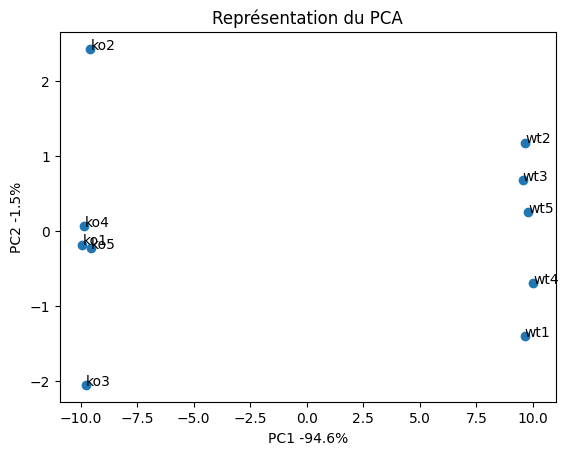

In [159]:
# construction d'un dataframe avec en index les nouvelles données 'scaled' et en colonne les PC's

pca_df= pd.DataFrame(pca_data, index=wt+ko,columns=labels)
display(pca_df)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('Représentation du PCA')
plt.xlabel('PC1 -{0}%'.format(pc_var[0]))
plt.ylabel('PC2 -{0}%'.format(pc_var[1]))

for x in pca_df.index:
    plt.annotate(x,(pca_df.PC1.loc[x],pca_df.PC2.loc[x]))

plt.show()

In [160]:
loading_scores =pd.Series(pca.components_[0],index=genes)
print(loading_scores)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene1     -0.102390
gene2     -0.102545
gene3      0.102633
gene4     -0.101916
gene5      0.102406
             ...   
gene96    -0.100404
gene97     0.102660
gene98    -0.074008
gene99    -0.102194
gene100    0.102579
Length: 100, dtype: float64
gene89   -0.102782
gene75   -0.102762
gene37    0.102748
gene36    0.102739
gene78   -0.102737
gene85    0.102726
gene12   -0.102725
gene59   -0.102715
gene82    0.102714
gene76    0.102713
dtype: float64
